In [1]:
from project_paths import *

import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pylab as plt

#### We analyze how the target variable is related to each feature variable

In [2]:
# Loading lists of continuous and categorical features 
categorical_features = load_list_from_pkl('categorical_features.pkl')
continuous_features = load_list_from_pkl('continuous_features.pkl')

# Loading the data
# read the data
df = pd.read_csv(working_data_csv)
print("Row count:", df.shape[0], "Column count:", df.shape[1])

Row count: 39644 Column count: 61


### A bit of preprocessing here
#### We have the following features in the data:
Set 1:
 - data_channel_is_lifestyle	Is data channel 'Lifestyle'?
 - data_channel_is_entertainment	Is data channel 'Entertainment'?
 - data_channel_is_bus	Is data channel 'Business'?
 - data_channel_is_socmed	Is data channel 'Social Media'?
 - data_channel_is_tech	Is data channel 'Tech'?
 - data_channel_is_world	Is data channel 'World'?

Set 2:
 - weekday_is_monday	Was the article published on a Monday?
 - weekday_is_tuesday	Was the article published on a Tuesday?
 - weekday_is_wednesday	Was the article published on a Wednesday?
 - weekday_is_thursday	Was the article published on a Thursday?
 - weekday_is_friday	Was the article published on a Friday?
 - weekday_is_saturday	Was the article published on a Saturday?
 - weekday_is_sunday	Was the article published on a Sunday?

#### These are features that would normally be contained in 1 category and then encoded as OneHot features during preprocessing. 
#### For ease of visualization, we combine Set 1 into a single feature called 'data_channel' and Set 2 into another feature called 'day_of_week'
#### I verified before hand that there is no overlap in data_channel (i.e. each article falls into exactly one category), or in day_of_week (each article is published on exactly one day)

In [3]:
df_for_viz = df.copy()

def get_day_of_week(x):
    if x['weekday_is_monday']: return 'Monday'
    if x['weekday_is_tuesday']: return 'Tuesday'
    if x['weekday_is_wednesday']: return 'Wednesday'
    if x['weekday_is_thursday']: return 'Thursday'
    if x['weekday_is_friday']: return 'Friday'
    if x['weekday_is_saturday']: return 'Saturday'
    if x['weekday_is_sunday']: return 'Sunday'

df_for_viz['day_of_week'] = df_for_viz.apply(lambda x: get_day_of_week(x), axis=1)
df_for_viz = df_for_viz.drop(labels=['weekday_is_monday', 
                                    'weekday_is_tuesday', 
                                    'weekday_is_wednesday', 
                                    'weekday_is_thursday', 
                                    'weekday_is_friday', 
                                    'weekday_is_saturday', 
                                    'weekday_is_sunday'], axis=1)

def get_data_channel(x):
    if x['data_channel_is_lifestyle']: return 'Lifestyle'
    if x['data_channel_is_entertainment']: return 'Entertainment'
    if x['data_channel_is_bus']: return 'Business'
    if x['data_channel_is_socmed']: return 'Social Media'
    if x['data_channel_is_tech']: return 'Tech'
    if x['data_channel_is_world']: return 'World'
    return 'No_data_channel'

df_for_viz['topic'] = df_for_viz.apply(lambda x: get_data_channel(x), axis=1)
df_for_viz = df_for_viz.drop(labels=['data_channel_is_lifestyle', 
                                    'data_channel_is_entertainment', 
                                    'data_channel_is_bus', 
                                    'data_channel_is_socmed', 
                                    'data_channel_is_tech', 
                                    'data_channel_is_world'], axis=1)

# Converting the continuous target variable into a categorical variable
CONVERT_TARGET_TO_CATEGORICAL = True
if CONVERT_TARGET_TO_CATEGORICAL:
    df_for_viz["popular"] = df_for_viz["shares"].apply(lambda x: 1 if x > 1400 else 0)
    # df_for_viz = df_for_viz.drop(labels=['shares'], axis=1)


df_for_viz.to_csv(data_csv_for_preprocessing, index=False)
df_for_viz['topic'].head()

0    Entertainment
1         Business
2         Business
3    Entertainment
4             Tech
Name: topic, dtype: object

In [4]:
removed_features = ['weekday_is_monday', 
                    'weekday_is_tuesday', 
                    'weekday_is_wednesday', 
                    'weekday_is_thursday', 
                    'weekday_is_friday', 
                    'weekday_is_saturday', 
                    'weekday_is_sunday',
                    'data_channel_is_lifestyle', 
                    'data_channel_is_entertainment', 
                    'data_channel_is_bus', 
                    'data_channel_is_socmed', 
                    'data_channel_is_tech', 
                    'data_channel_is_world']
added_features = ['day_of_week', 'topic']
categorical_features = [x for x in categorical_features if x not in removed_features]
categorical_features += added_features

### Checking correlation between time and number of shares

In [7]:
df[['timedelta', 'shares']].corr()

,timedelta,shares
timedelta,1.000000,0.008662
shares,0.008662,1.000000


### 1. We first view the relationships between the features vs the target by viewing the **target as a continuous variable** (no of shares)

#### 1.1 First, we can view scatter plots of the continuous features vs the target (scatter plot)

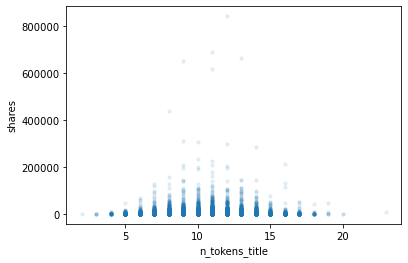

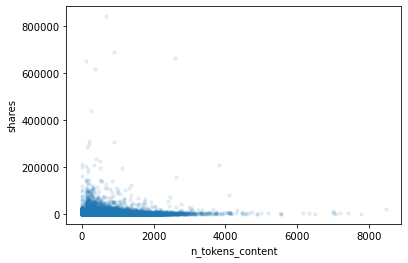

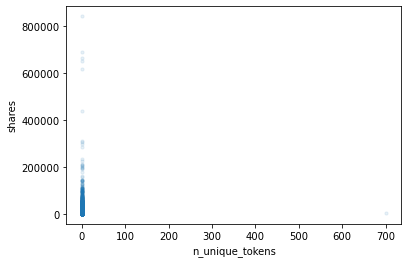

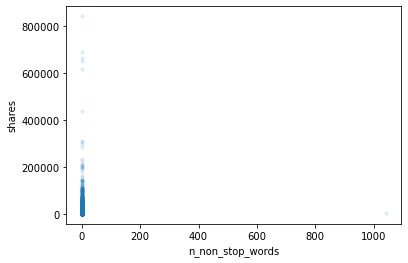

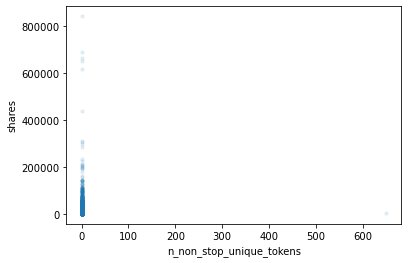

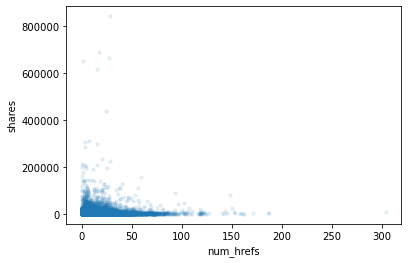

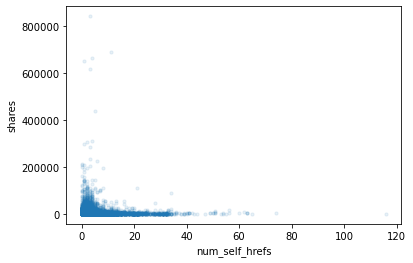

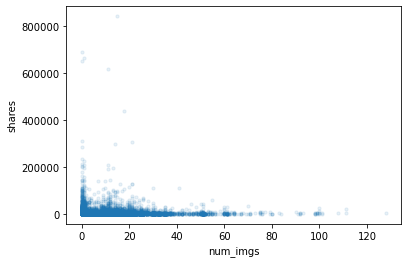

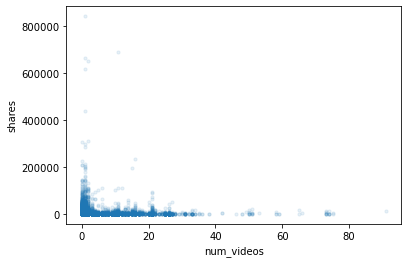

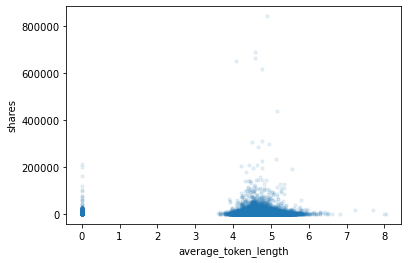

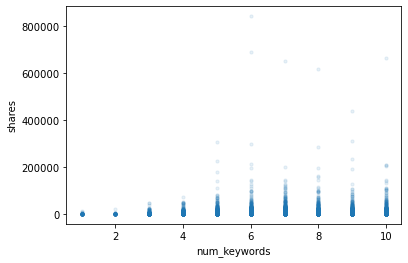

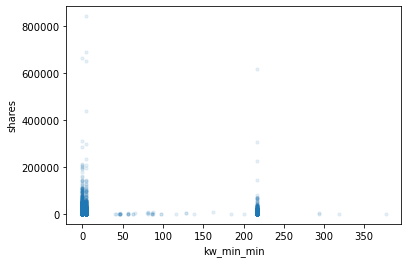

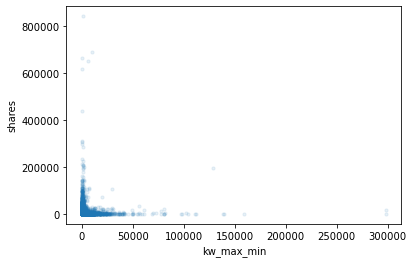

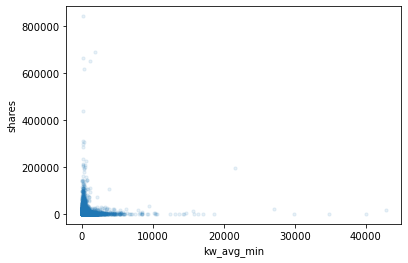

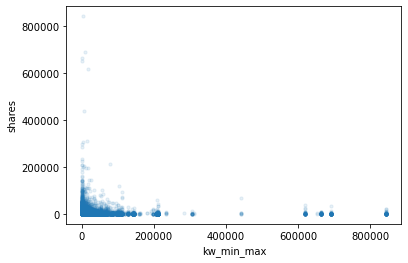

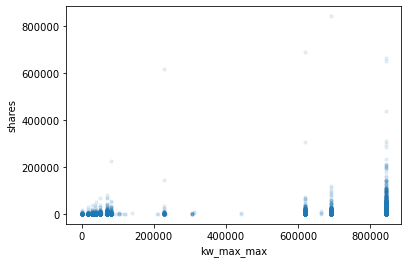

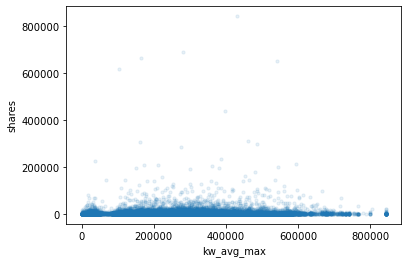

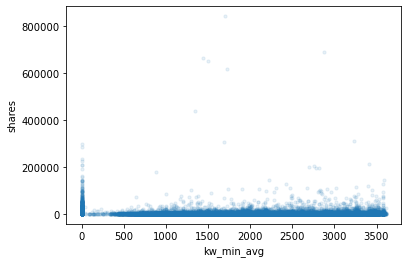

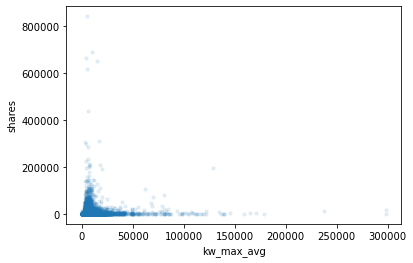

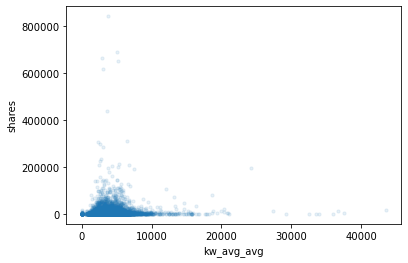

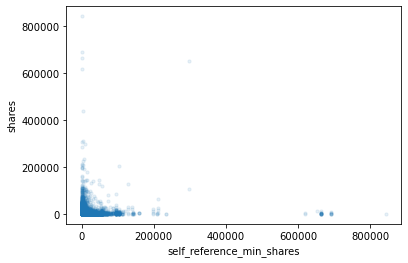

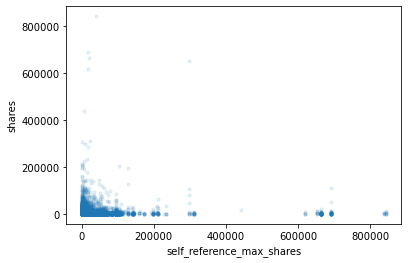

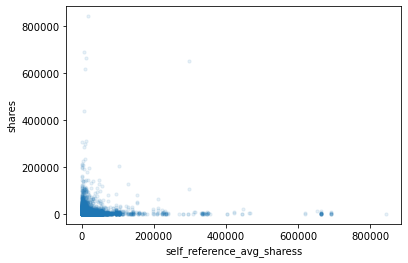

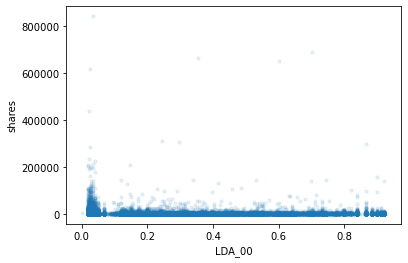

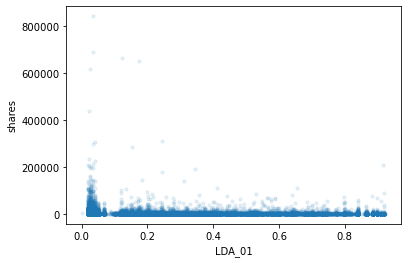

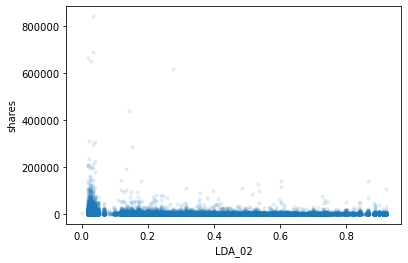

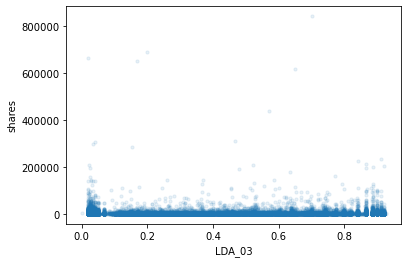

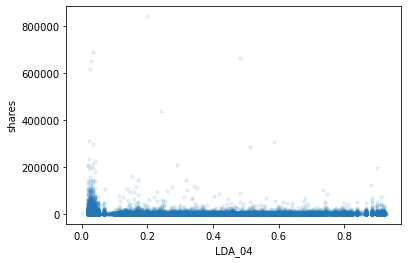

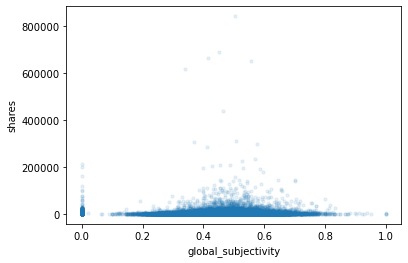

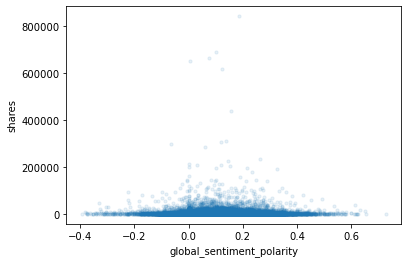

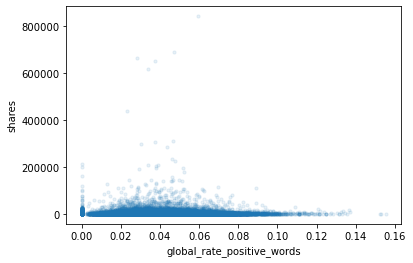

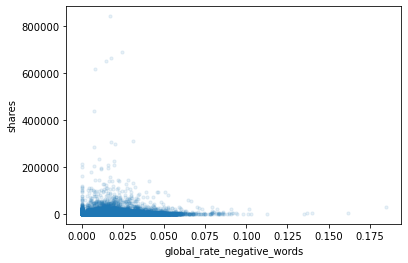

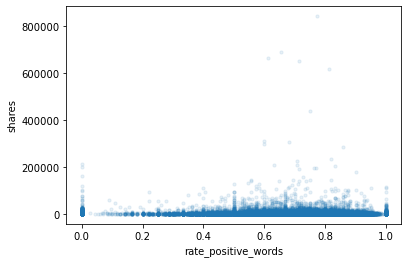

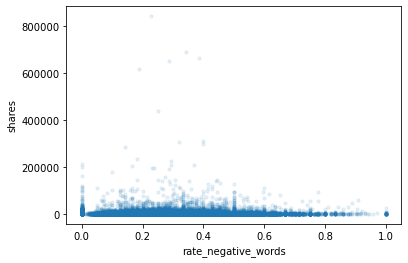

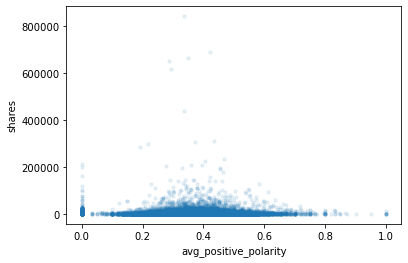

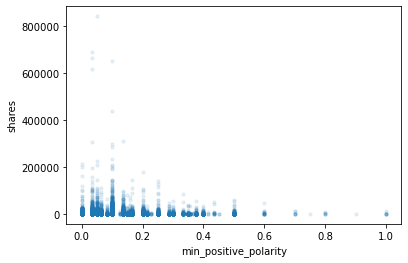

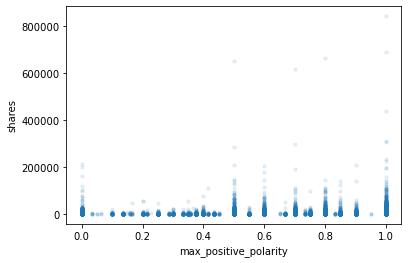

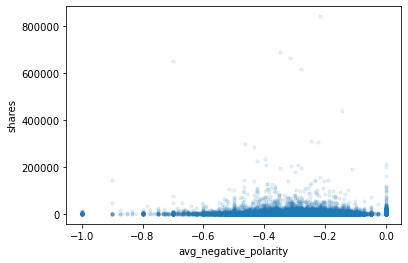

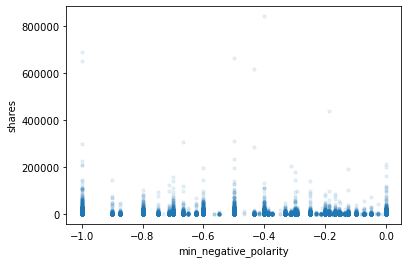

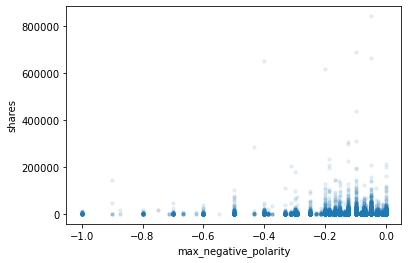

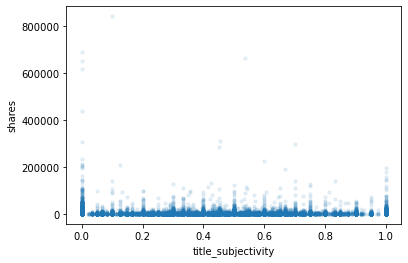

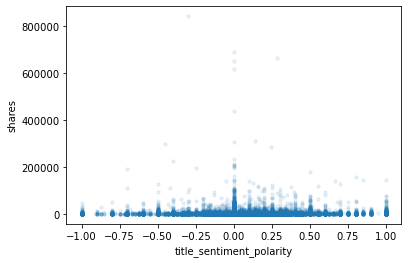

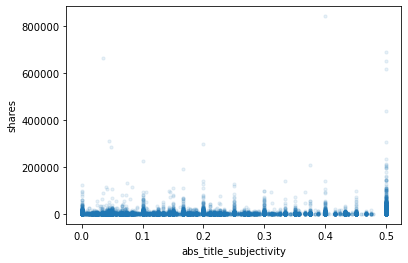

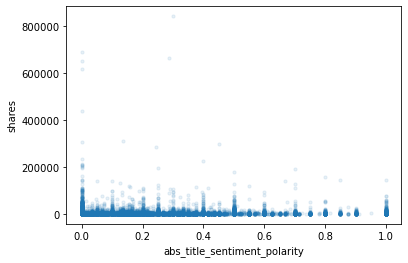

In [5]:
for f in continuous_features:
    df_for_viz.plot.scatter(f, 'shares', s=10, alpha=0.1, colormap="Pastel1")
    plt.show()

#### 1.2 Then, we can view scatter plots of the categorical features vs the target (box plot/violin plot)

In [6]:
def box_plot(df, col):
    df[[col,'shares']].boxplot(by=col)
    plt.ylabel('shares')
    plt.xlabel(col)
    plt.show()

def violin_plot(df, col):
    unique_vals = df[col].dropna().unique()
    dataset = [df[df[col]==val]["shares"].values for val in unique_vals]
    plt.violinplot(dataset = dataset)
    plt.xticks(range(1,len(unique_vals)+1),unique_vals)
    plt.ylabel(col)
    plt.show()


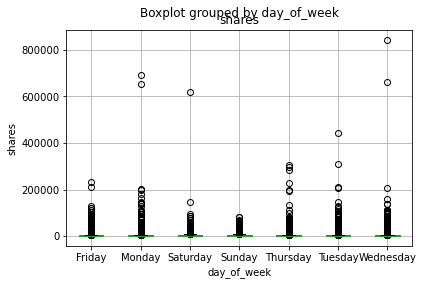

In [7]:
col = 'day_of_week'
columns_my_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_for_viz[[col,'shares']].boxplot(by=col)
plt.ylabel('shares')
plt.xlabel(col)
plt.show()

# TBD: SORT BY DAY OF WEEK

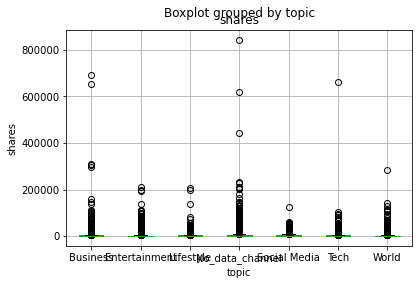

In [8]:
col = 'topic'
df_for_viz[[col,'shares']].boxplot(by=col)
plt.ylabel('shares')
plt.xlabel(col)
plt.show()

### 2. Now, we view the relationships between the features vs the target by viewing the **target as a categorical variable** (whether the article was popular or not)

#### 2.1 We can view scatter plots of the continuous features vs the target (category-specific histograms/box plot/violin plot)

In [9]:
threshold = 1400
df_for_viz['shares_cat'] = df_for_viz['shares'].apply(lambda x: 1 if x > 1400 else 0)
# df_for_viz[['shares', 'shares_cat']].head(20)

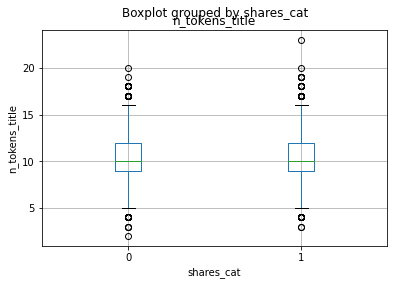

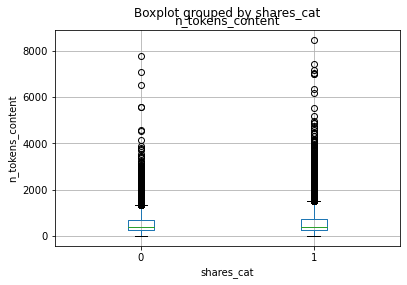

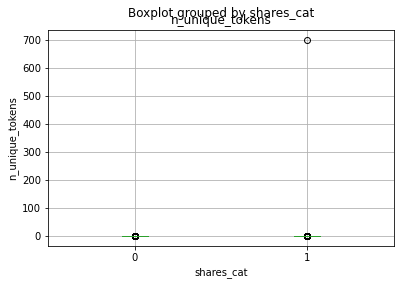

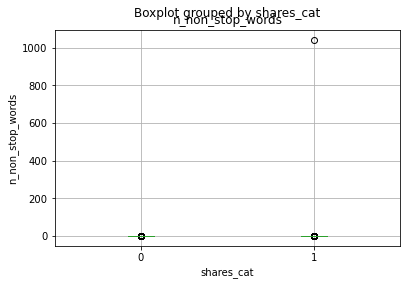

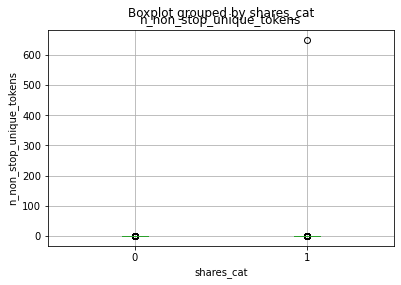

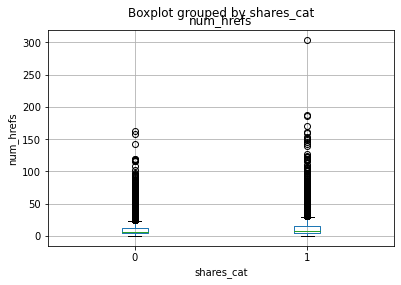

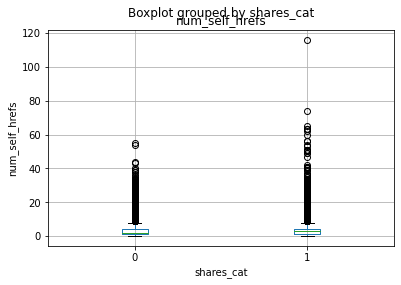

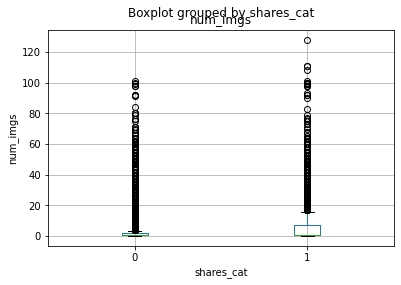

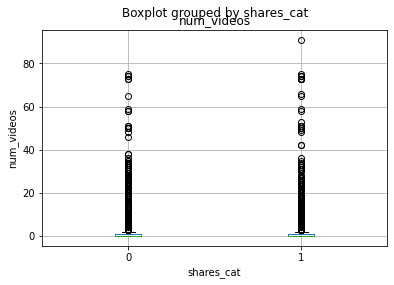

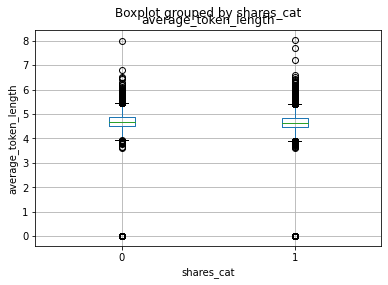

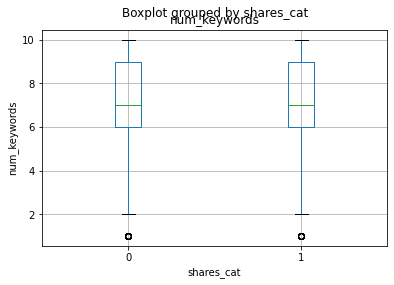

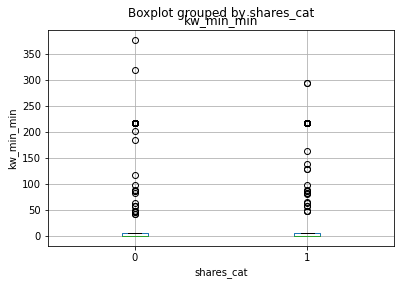

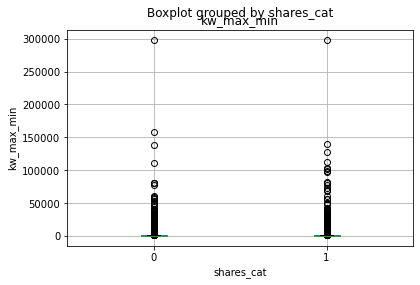

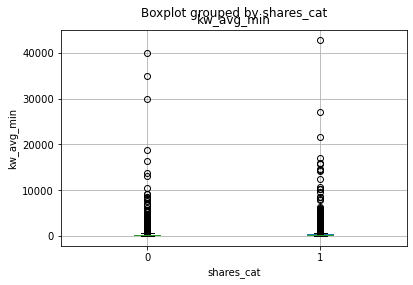

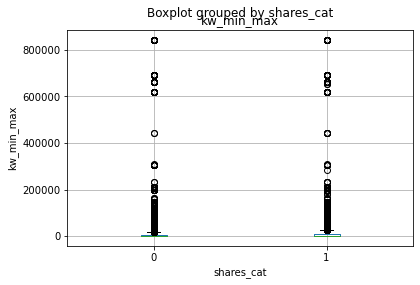

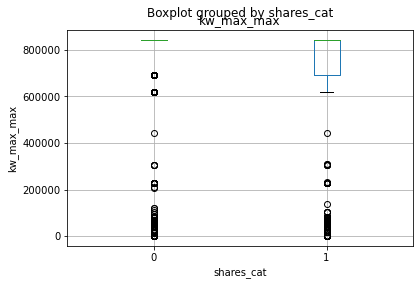

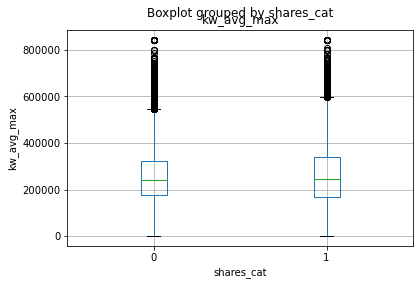

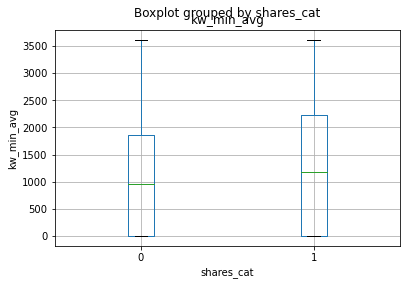

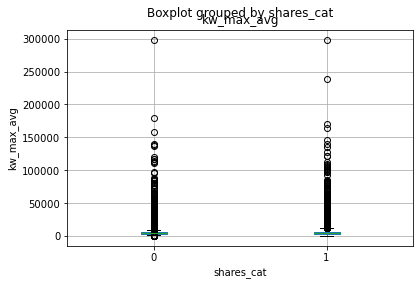

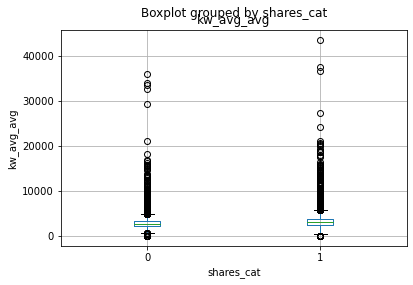

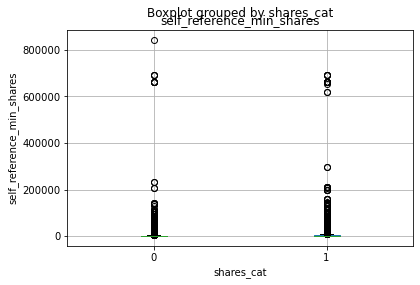

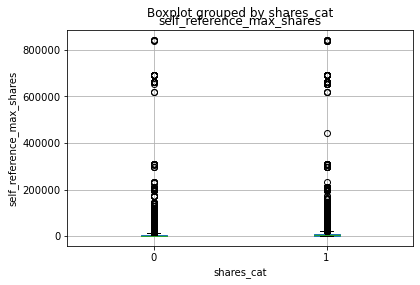

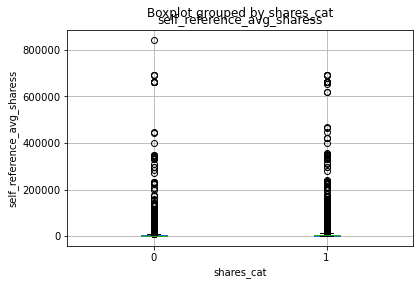

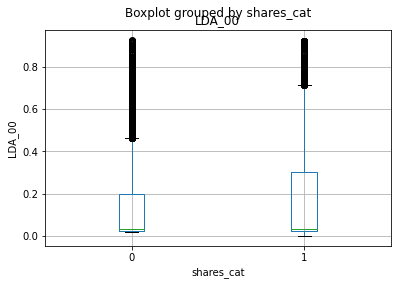

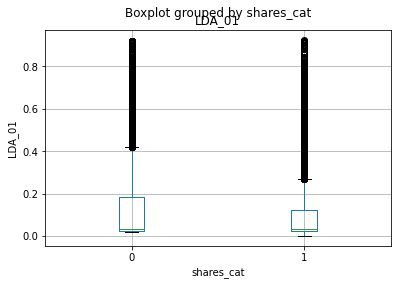

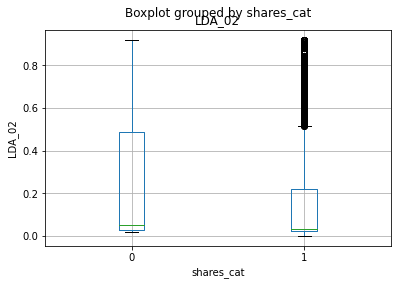

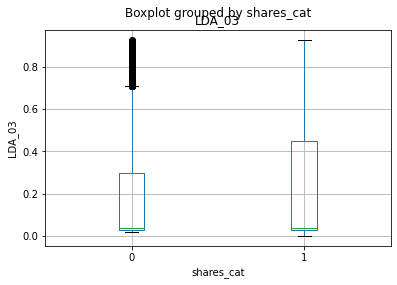

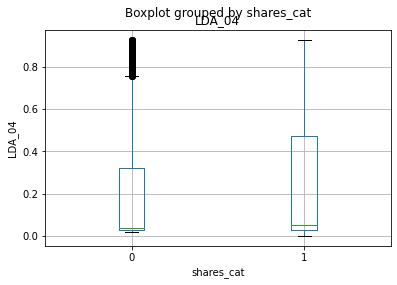

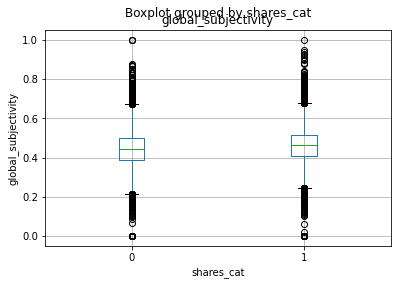

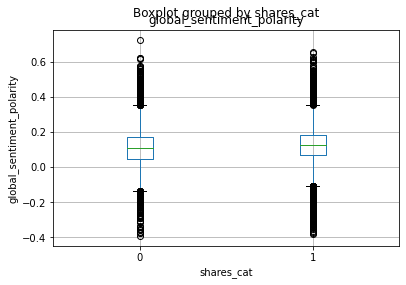

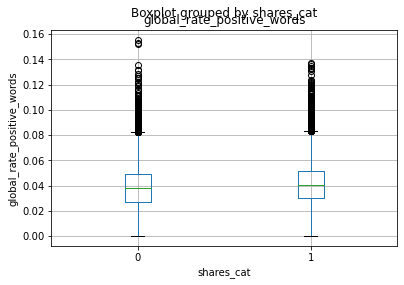

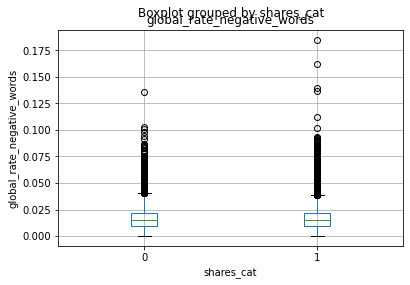

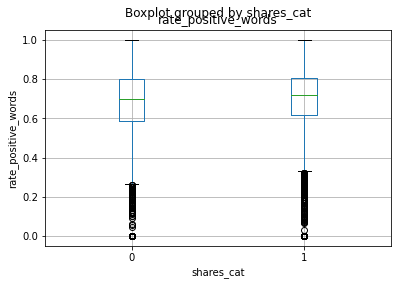

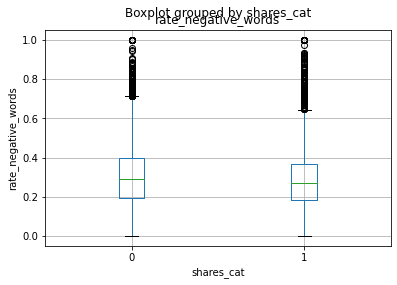

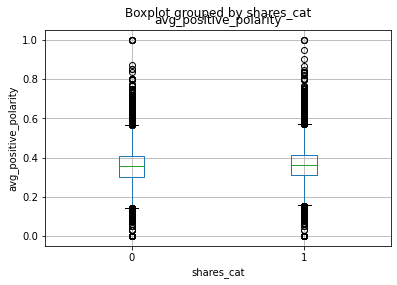

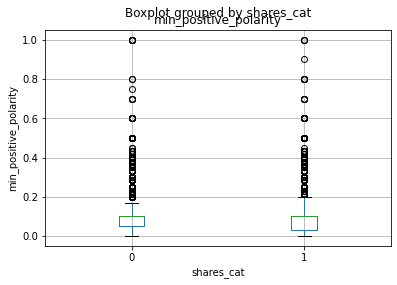

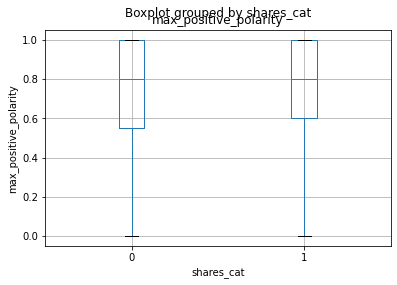

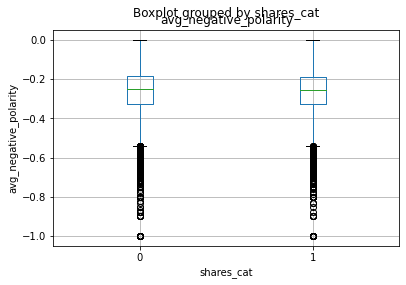

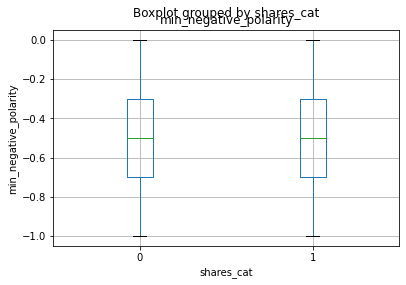

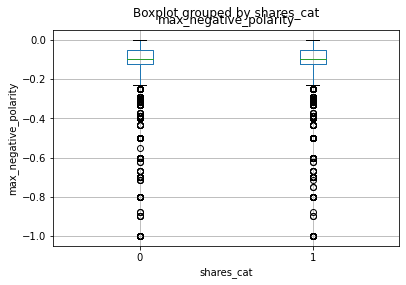

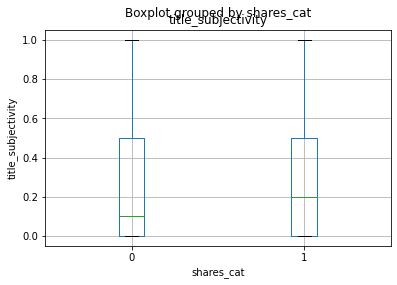

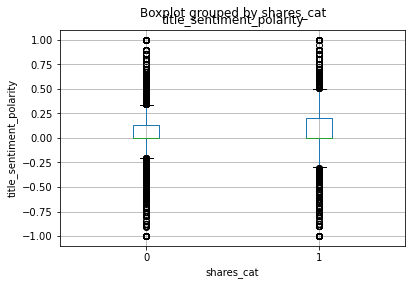

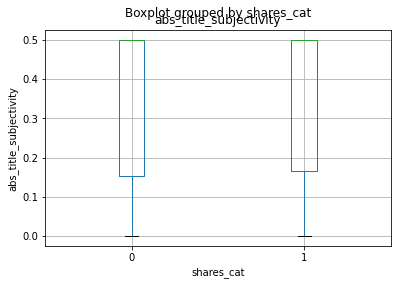

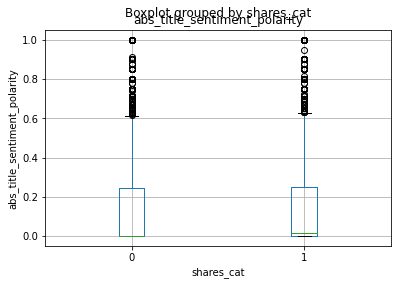

In [10]:
for f in continuous_features:
    df_for_viz[[f,'shares_cat']].boxplot(by='shares_cat')
    plt.ylabel(f)
    plt.xlabel('shares_cat')
    plt.show()

#### 2.2 Finally, we can view scatter plots of the categorical features vs the target (stacked bar plot)

In [11]:
def plot_stacked_bar(df, col):
    count_matrix = df.groupby([col, 'shares_cat']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('Fraction of articles in group')
    # plt.xlabel('Fraction of articles in group')
    plt.legend(loc=4)
    plt.show()


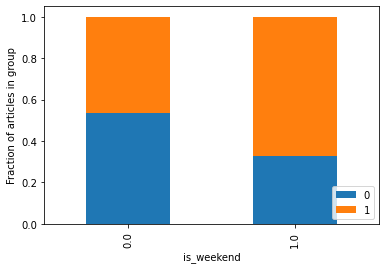

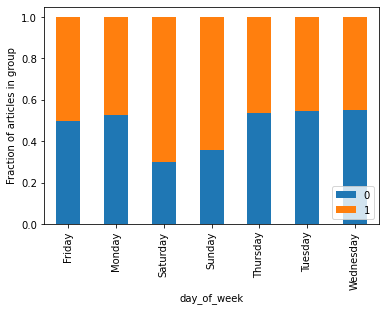

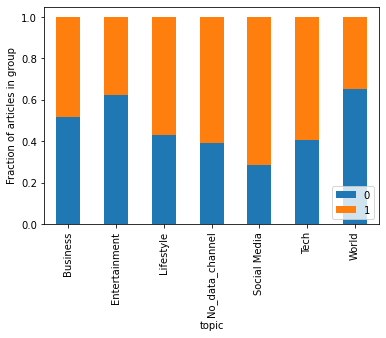

In [12]:
for f in categorical_features:
    plot_stacked_bar(df_for_viz, f)

### Scatter Matrix

In [13]:
df_for_viz.columns


Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_

In [14]:
# cols_for_scatter_mat = ['LDA_02', 
#                         'LDA_04', 
#                         'num_imgs', 
#                         'num_hrefs', 
#                         'kw_min_avg',
#                         'global_rate_negative_words', 
#                         'shares_cat']
cols_for_scatter_mat = ['LDA_02', 
                        'num_imgs', 
                        'kw_min_avg',
                        'num_hrefs', 
                        'shares_cat']
df_for_viz_scatter_mat = df_for_viz[cols_for_scatter_mat]

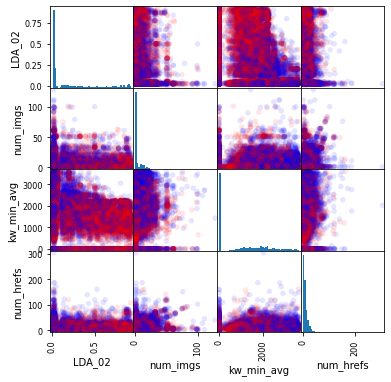

In [15]:
colors = {0:'red', 1:'blue'}
pd.plotting.scatter_matrix(df_for_viz_scatter_mat.select_dtypes(float, int), figsize=(6,6), 
                           c = df_for_viz['shares_cat'].map(colors), 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
# plt.show()
plt.rcParams["figure.dpi"] = 300
# plt.title("Scatter matrix for selected features", x=2.5, y=2.5)
plt.savefig(figures_dir + '3_scatterplot.png')

## Correlation Matrix

In [16]:
print(df_for_viz.shape)
df_for_viz.head()

(39644, 52)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,topic,popular,shares_cat
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainment,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business,1,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainment,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Tech,0,0


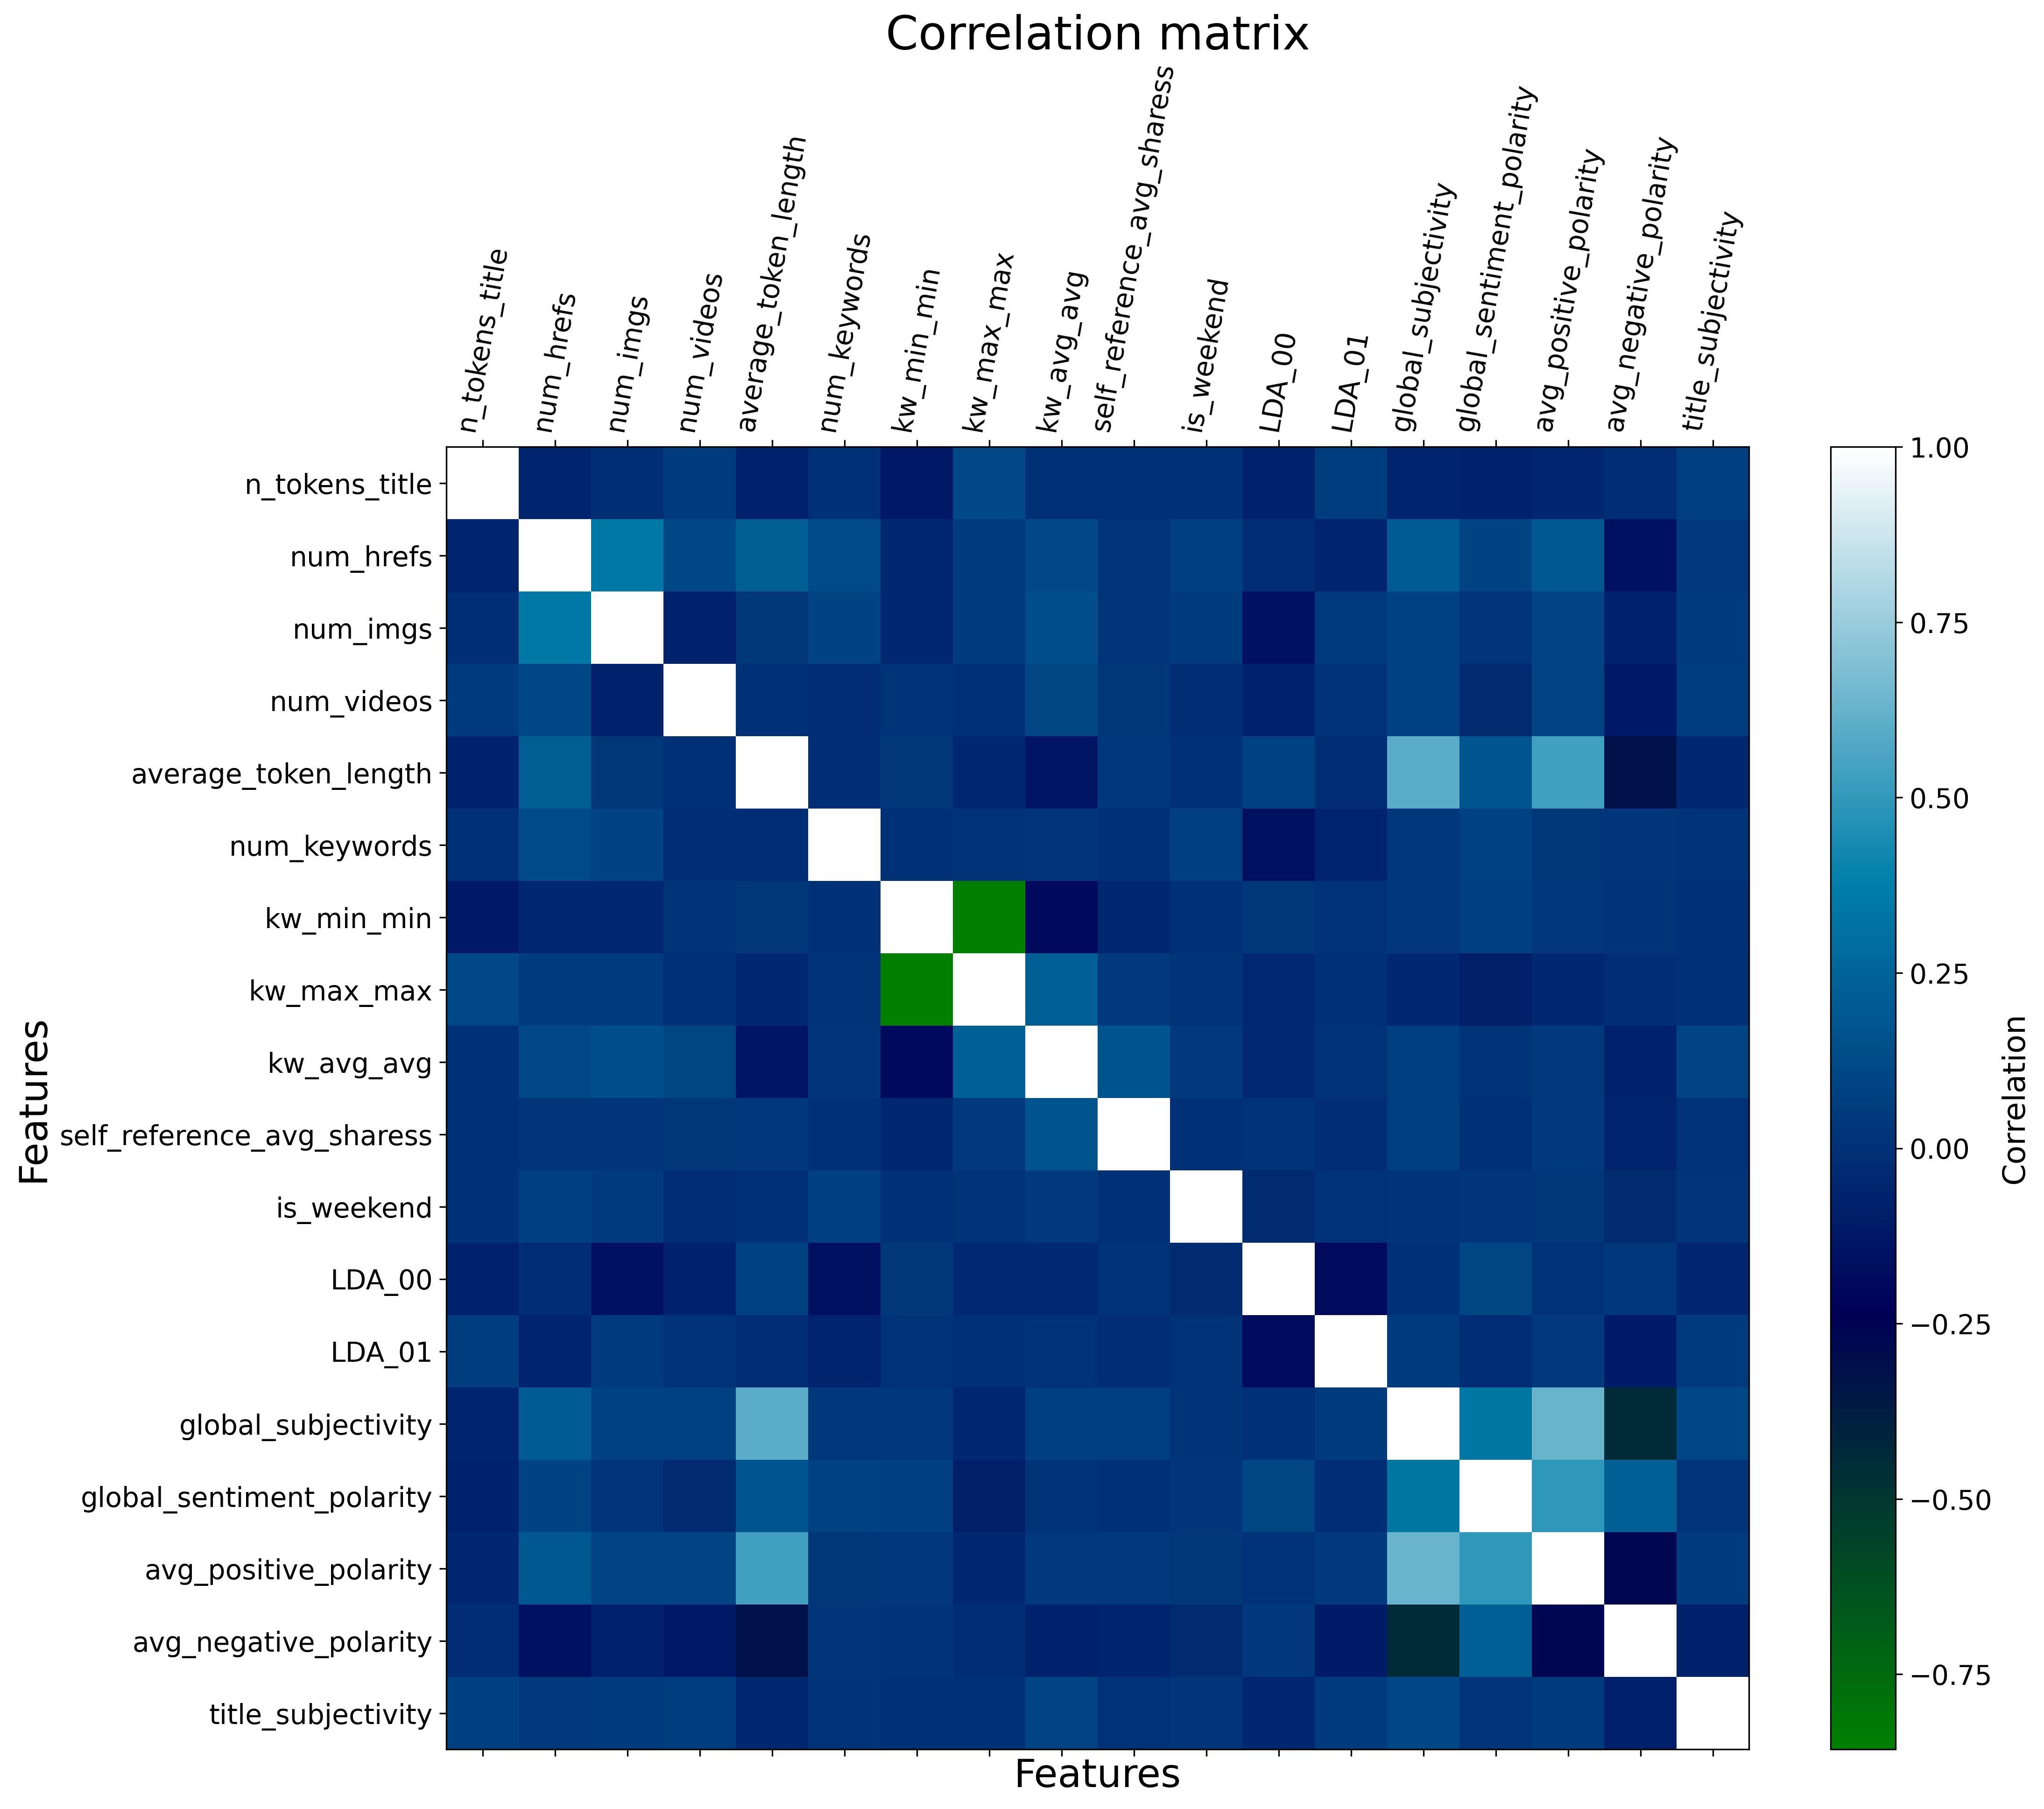

In [35]:
cols_to_keep_for_corr = ['n_tokens_title', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_max_max', 'kw_avg_avg', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'global_subjectivity',
       'global_sentiment_polarity', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_subjectivity', ]

# df_corr = df_for_viz.select_dtypes(['number']).drop(labels=, axis=1).copy()
df_corr = df_for_viz.select_dtypes(['number'])[cols_to_keep_for_corr].copy()

f = plt.figure(figsize=(15, 12))
corr_mat = df_corr.corr()
plt.matshow(corr_mat, fignum=f.number, cmap="ocean")
plt.xticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, 
           fontsize=14, rotation=80)
plt.yticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, 
           fontsize=14)
cb = plt.colorbar(label="Correlation")
cb.ax.tick_params(labelsize=14)
cb.set_label(label='Correlation', fontsize=16)

plt.xlabel("Features", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.title("Correlation matrix", fontsize=24)
plt.rcParams["figure.dpi"] = 300
# plt.rcParams["figure.autolayout"] = True
# plt.tight_layout()
plt.savefig(figures_dir + 'correlation_matrix.png', bbox_inches='tight')

### Popularity of different topics over time

In [28]:
timeline_cols = ['timedelta', 'topic', 'shares']
df_2 = df_for_viz[timeline_cols]
df_2 = df_2.sort_values(by=['timedelta', 'topic'], ascending=[False, True]).reset_index(drop=True)
df_2['week'] = df_2['timedelta'].apply(lambda x: 105 - x//7)
df_2.head()

,timedelta,topic,shares,week
0,731.0,Business,711,1.0
1,731.0,Business,1500,1.0
2,731.0,Business,3100,1.0
3,731.0,Business,852,1.0
4,731.0,Business,425,1.0


In [29]:
timeline_cols = ['timedelta', 'topic', 'shares']
df_2 = df_for_viz[timeline_cols]
df_2 = df_2.sort_values(by=['timedelta', 'topic'], ascending=[False, True]).reset_index(drop=True)
df_2['month'] = df_2['timedelta'].apply(lambda x: 25 - x//30)

In [30]:
import datetime
import calendar
def get_month(x):
    if x >= 25:
        m = x - 24
        y = 2
    elif x >= 13:
        m = x - 12
        y = 1
    else:
        m = x
        y = 0
    month = datetime.date(year=2013 + y, month=int(m), day=calendar.monthrange(2013 + y, int(m))[1])
    return month

In [32]:
grouped_topic_week = df_2[['topic', 'month', 'shares']].groupby(['month', 'topic']).sum()
grouped_topic_week = grouped_topic_week.reset_index()
grouped_topic_week['mth'] = grouped_topic_week['month'].apply(lambda x: get_month(x))
grouped_topic_week = grouped_topic_week.pivot(index='mth', columns='topic', values='shares')
grouped_topic_week = grouped_topic_week.drop('No_data_channel', axis=1)

In [33]:
grouped_topic_week.head()

topic,Business,Entertainment,Lifestyle,Social Media,Tech,World
mth,,,,,,
2013-01-31,160459,299054,226556,229032,397951,207939
2013-02-28,663975,693077,391783,518750,969506,470171
2013-03-31,1004790,563767,399720,601251,1560330,471218
2013-04-30,1623899,889908,374223,486288,1047710,600122
2013-05-31,683842,657153,364950,346246,908749,422963


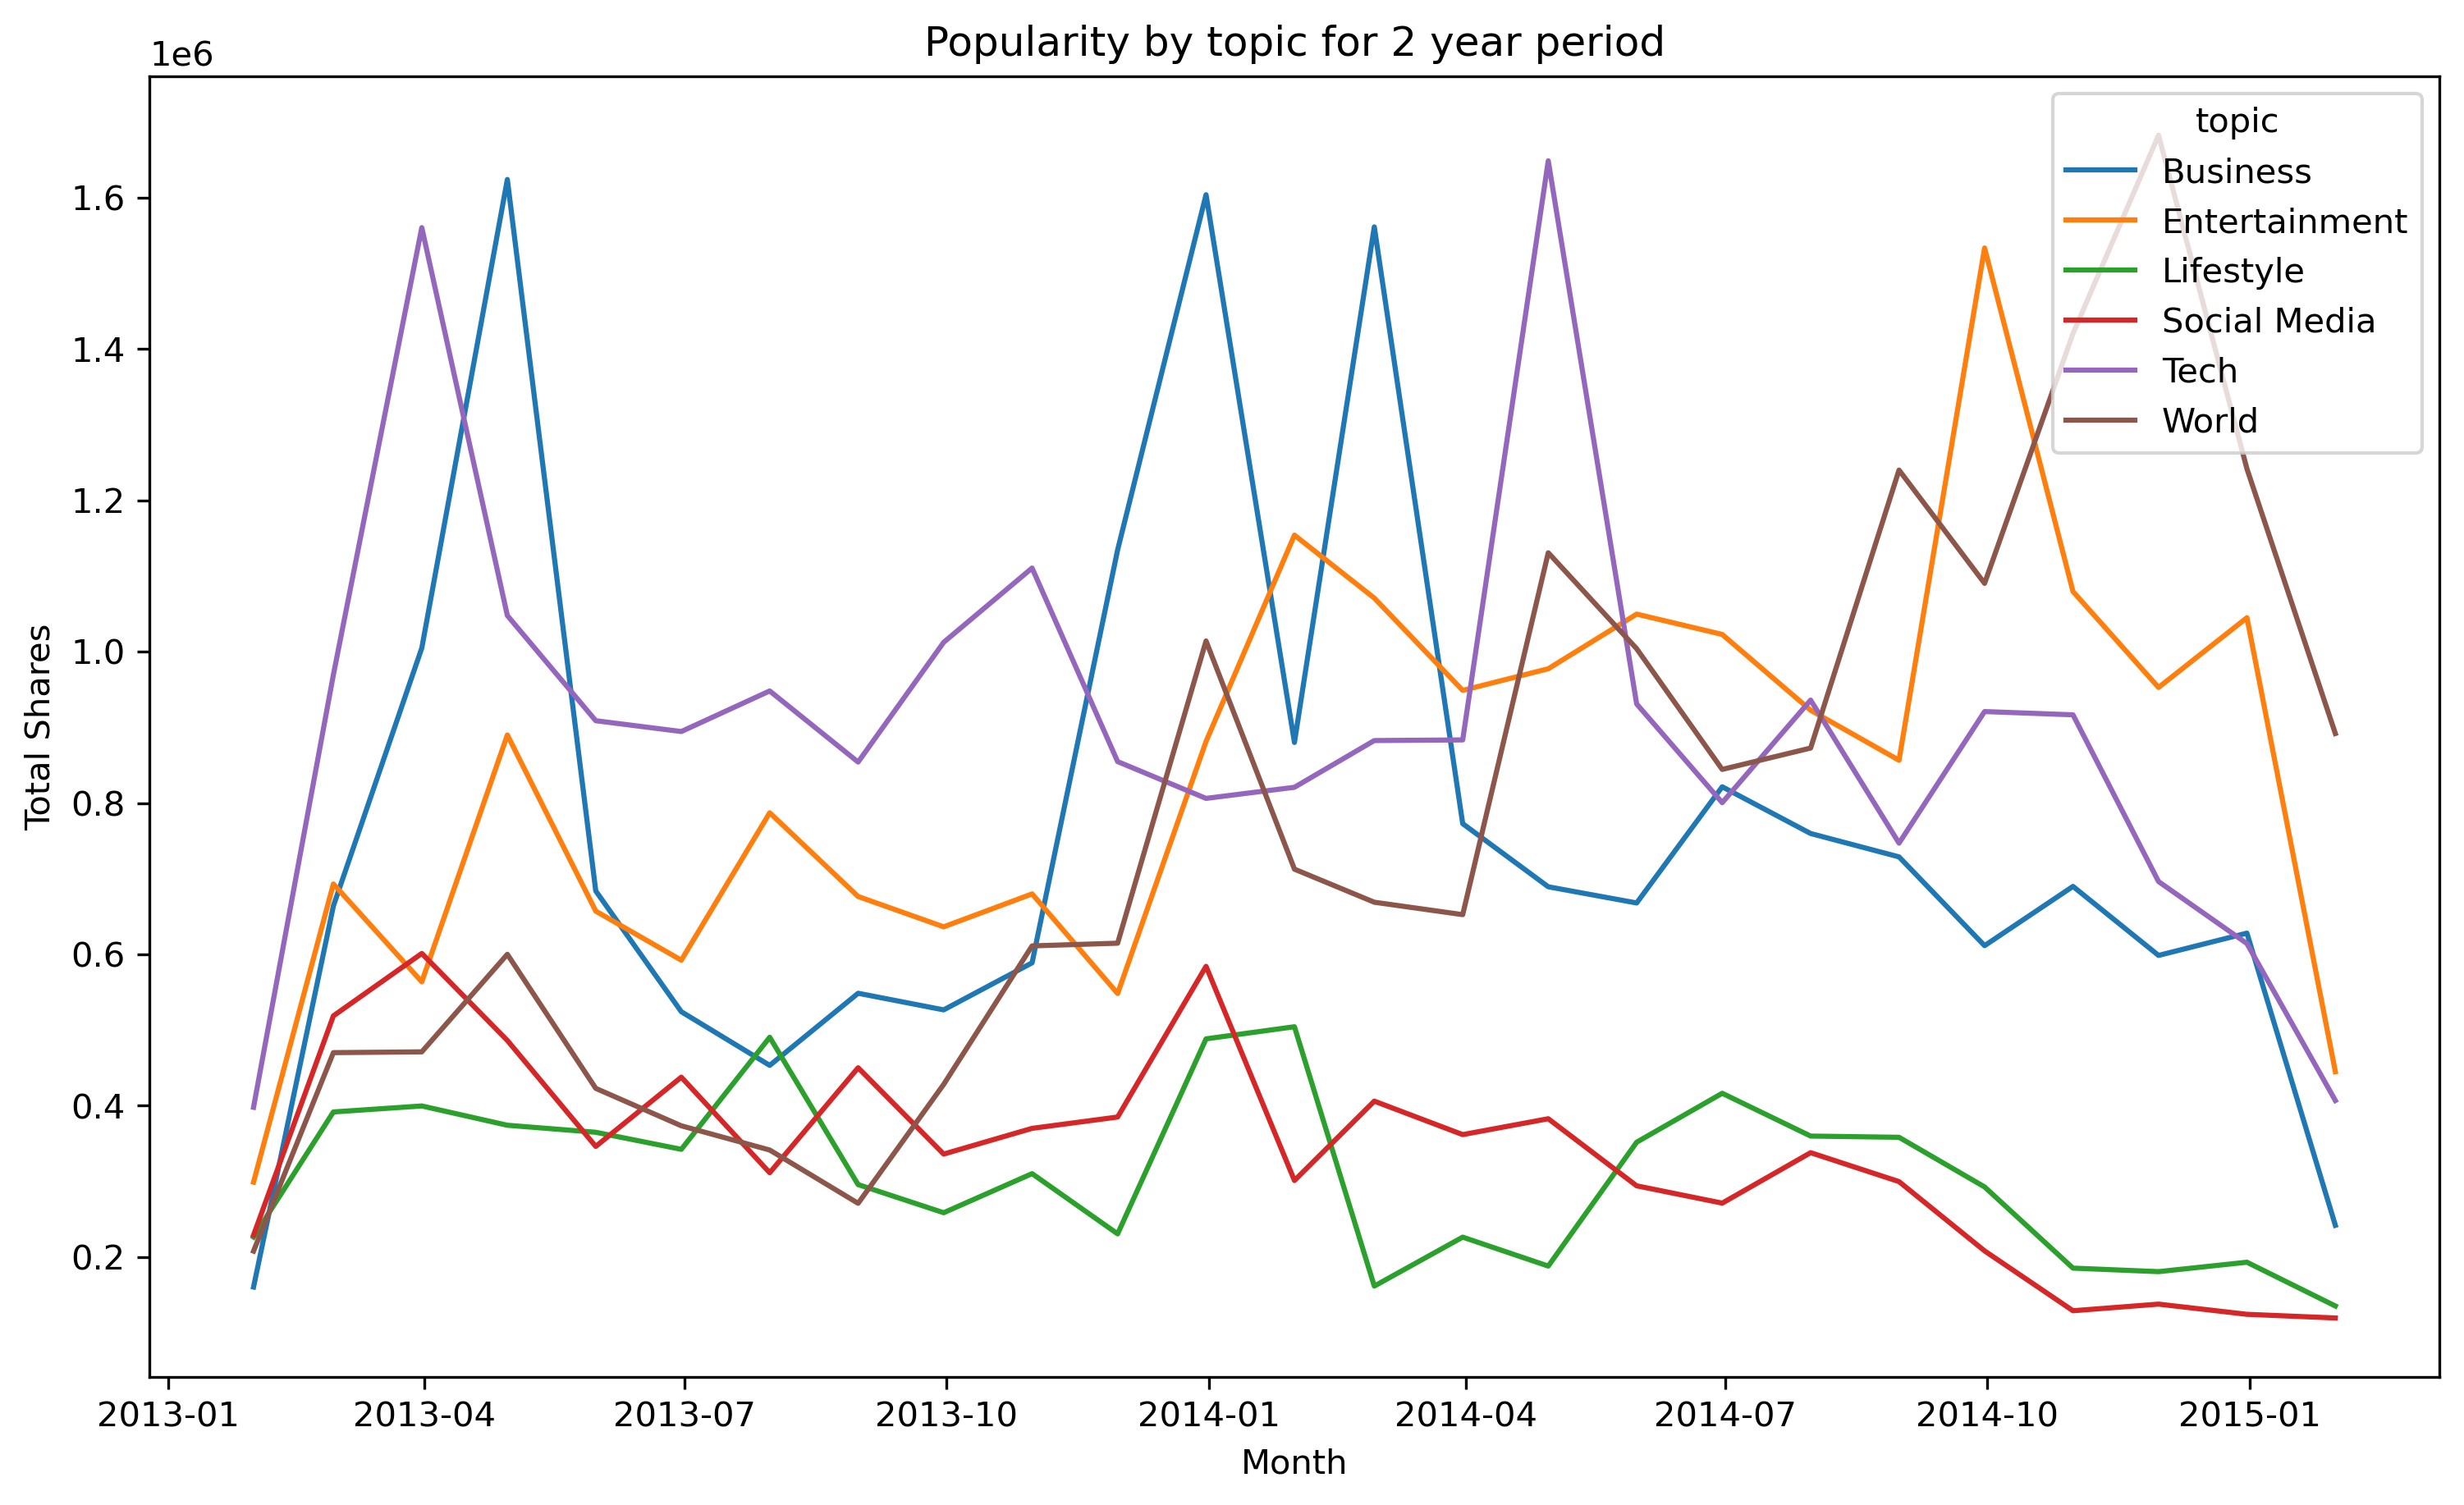

In [34]:
grouped_topic_week.plot.line(figsize=(12,7))
plt.xlabel("Month")
plt.ylabel("Total Shares")
plt.title("Popularity by topic for 2 year period")
plt.rcParams["figure.dpi"] = 300
plt.savefig(figures_dir + '1_popularity_by_topic_timeline.png')